In [1]:
import os
import pathlib
from pathlib import Path
import hashlib
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

In [2]:
source_dirs = [
    r"D:\Đồ án\KLTN\Backend\data\data\rice_disease",
    r"D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\train",
    r"D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\validation",
    r"D:\Đồ án\KLTN\Backend\data\data\rice_leaf_diseases",
    r"D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\train",
    r"D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\test"
]

In [3]:
resize_required_dirs = [
    r"D:\Đồ án\KLTN\Backend\data\data\rice_leaf_diseases",
    r"D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\train",
    r"D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\test"
]

In [4]:
for data_dir in source_dirs:
    print(data_dir)

D:\Đồ án\KLTN\Backend\data\data\rice_disease
D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\train
D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\validation
D:\Đồ án\KLTN\Backend\data\data\rice_leaf_diseases
D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\train
D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\test


In [5]:
for data_dir in source_dirs:
    print(f"Class name in {data_dir}")
    print(os.listdir(data_dir))

Class name in D:\Đồ án\KLTN\Backend\data\data\rice_disease
['Bacterialblight', 'Blast', 'Brownspot']
Class name in D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\train
['BrownSpot', 'Healthy', 'LeafBlast']
Class name in D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\validation
['BrownSpot', 'Healthy', 'LeafBlast']
Class name in D:\Đồ án\KLTN\Backend\data\data\rice_leaf_diseases
['Bacterial leaf blight', 'Brown spot']
Class name in D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\train
['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot', 'neck_blast', 'rice_hispa', 'sheath_blight', 'tungro']
Class name in D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\test
['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot', 'Neck_Blast', 'Rice Hispa', 'Sheath Blight', 'Tungro']


In [6]:
for data_dir in source_dirs:
    print(f"count of image in {data_dir}")
    print(len(list(pathlib.Path(data_dir).glob("*/*.jpg"))))

count of image in D:\Đồ án\KLTN\Backend\data\data\rice_disease
4624
count of image in D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\train
1200
count of image in D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\validation
369
count of image in D:\Đồ án\KLTN\Backend\data\data\rice_leaf_diseases
80
count of image in D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\train
15023
count of image in D:\Đồ án\KLTN\Backend\data\data\Rice_Leaf_Diease\Rice_Leaf_Diease\test
3419


In [7]:
for data_dir in source_dirs:
    for class_folder in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_folder)
        if os.path.isdir(class_path):  
            print(f"Number of category: {class_folder} in folder {data_dir}")
            image_count = len(list(pathlib.Path(class_path).glob("*.jpg")))  
            print(image_count)

Number of category: Bacterialblight in folder D:\Đồ án\KLTN\Backend\data\data\rice_disease
1584
Number of category: Blast in folder D:\Đồ án\KLTN\Backend\data\data\rice_disease
1440
Number of category: Brownspot in folder D:\Đồ án\KLTN\Backend\data\data\rice_disease
1600
Number of category: BrownSpot in folder D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\train
400
Number of category: Healthy in folder D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\train
400
Number of category: LeafBlast in folder D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\train
400
Number of category: BrownSpot in folder D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\validation
123
Number of category: Healthy in folder D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\validation
123
Number of category: LeafBlast in folder D:\Đồ án\KLTN\Backend\data\data\RiceDiseaseDataset\validation
123
Number of category: Bacterial leaf blight in folder D:\Đồ án\KLTN\Backend\data\data\rice_leaf_diseases
40
Numbe

In [ ]:
clean_data_dir = Path(r"D:\Đồ án\KLTN\Backend\data\data\clean_image")

In [15]:
standard_classes = {
    # bacterial_leaf_blight
    "Bacterialblight": "bacterial_leaf_blight",
    "Bacterial leaf blight": "bacterial_leaf_blight",
    "bacterial_leaf_blight": "bacterial_leaf_blight", 
    
    # blast
    "Blast": "blast",
    "blast": "blast",
    "Blast Disease": "blast",
    "LeafBlast": "blast", 
    "leaf_blast": "blast",

    # brown_spot
    "Brownspot": "brown_spot",
    "Brown spot": "brown_spot",
    "BrownSpot": "brown_spot",
    "brown_spot": "brown_spot", 

    # healthy
    "Healthy": "healthy",
    "healthy": "healthy" 
}

In [16]:
for class_name in set(standard_classes.values()):
    (clean_data_dir / class_name).mkdir(parents=True, exist_ok=True)

In [18]:
hash_set = set()
processed_count = 0
duplicate_count = 0
error_count = 0
STANDARD_SIZE = (300, 300)

In [19]:
for data_dir in tqdm(source_dirs, desc="Processing Directories"):
    path_obj = Path(data_dir)
    for class_folder in path_obj.iterdir():
        if not class_folder.is_dir():
            continue
    
        standardized_class = standard_classes.get(class_folder.name)
        if standardized_class is None:
            print(f"\nCảnh báo: Bỏ qua class không xác định: {class_folder.name}")
            continue

        for file_path in class_folder.glob('*.*'): 
            try:
                with open(file_path, "rb") as f:
                    img_bytes = f.read()
                    img_hash = hashlib.md5(img_bytes).hexdigest()
            except Exception as e:
                print(f"\nLỗi đọc file {file_path}: {e}")
                error_count += 1
                continue

            if img_hash not in hash_set:
                hash_set.add(img_hash)
                
                save_name = f"{img_hash}{file_path.suffix}"
                save_path = clean_data_dir / standardized_class / save_name

                try:
                    img = Image.open(file_path).convert("RGB")
                    
                    if data_dir in resize_required_dirs:
                        img = img.resize(STANDARD_SIZE)
                    
                    img.save(save_path)
                    processed_count += 1
                except Exception as e:
                    print(f"\nLỗi khi xử lý ảnh {file_path}: {e}")
                    hash_set.remove(img_hash)
                    error_count += 1
            else:
                duplicate_count += 1

Processing Directories:  83%|████████▎ | 5/6 [03:54<01:05, 65.59s/it]


Cảnh báo: Bỏ qua class không xác định: leaf_scald

Cảnh báo: Bỏ qua class không xác định: narrow_brown_spot

Cảnh báo: Bỏ qua class không xác định: neck_blast

Cảnh báo: Bỏ qua class không xác định: rice_hispa

Cảnh báo: Bỏ qua class không xác định: sheath_blight

Cảnh báo: Bỏ qua class không xác định: tungro


Processing Directories: 100%|██████████| 6/6 [04:26<00:00, 44.39s/it]


Cảnh báo: Bỏ qua class không xác định: leaf_scald

Cảnh báo: Bỏ qua class không xác định: narrow_brown_spot

Cảnh báo: Bỏ qua class không xác định: Neck_Blast

Cảnh báo: Bỏ qua class không xác định: Rice Hispa

Cảnh báo: Bỏ qua class không xác định: Sheath Blight

Cảnh báo: Bỏ qua class không xác định: Tungro


In [21]:
print(len(list(pathlib.Path(clean_data_dir).glob("*/*.jpg"))))

13204


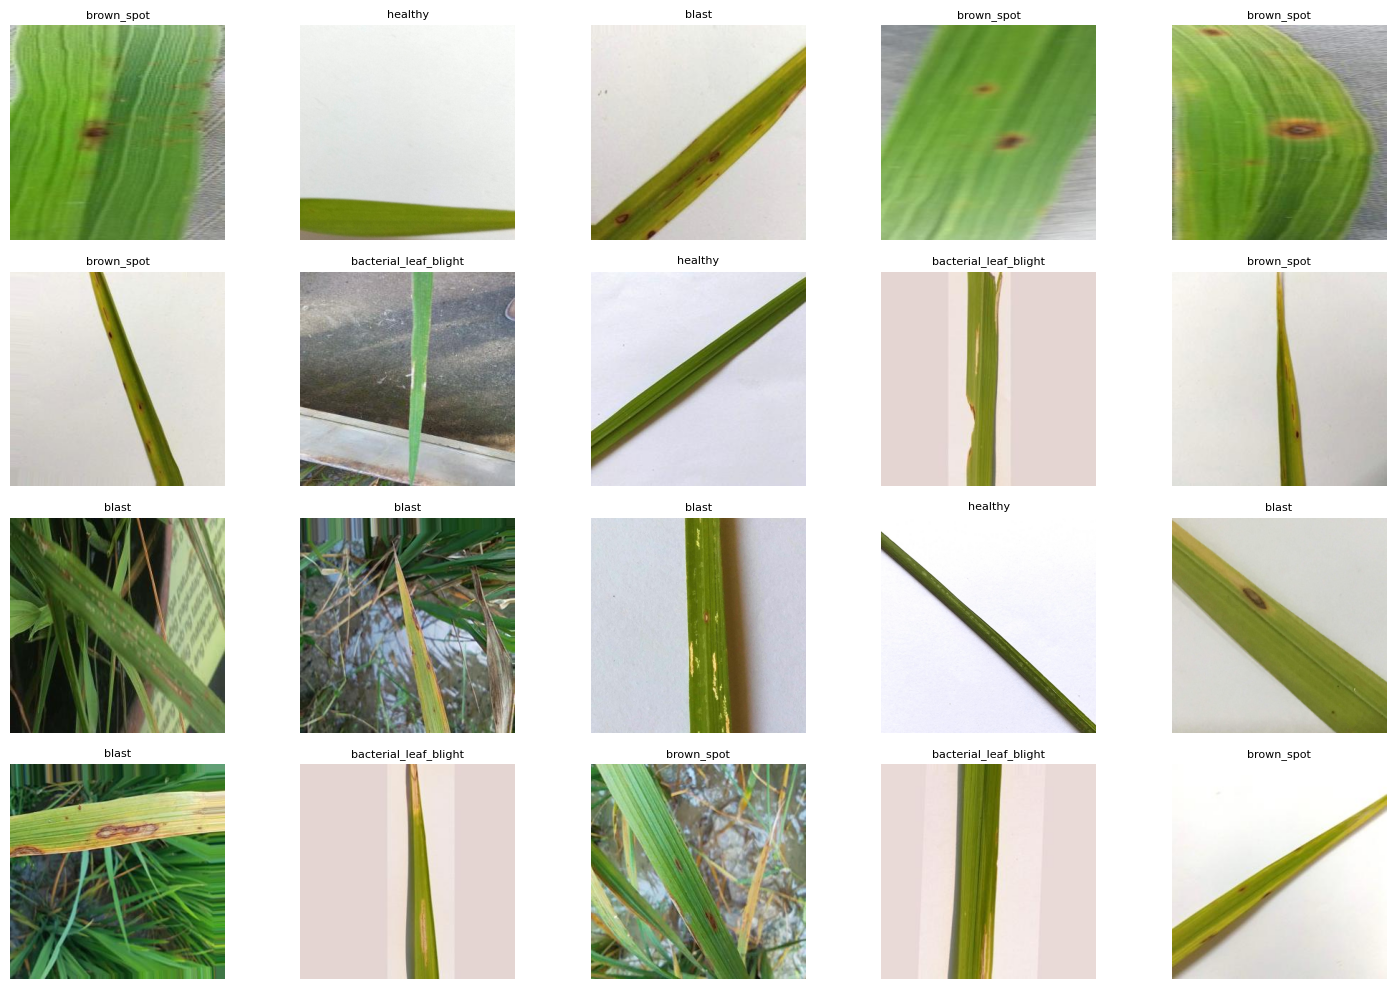

In [23]:
all_images = []
for class_folder in os.listdir(clean_data_dir):
    class_path = os.path.join(clean_data_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            all_images.append((img_path, class_folder))

sample_images = random.sample(all_images, min(20, len(all_images)))

plt.figure(figsize=(15, 10))
for i, (img_path, class_name) in enumerate(sample_images):
    img = Image.open(img_path)
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(class_name, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:
test_ratio = 0.2

In [1]:
output_dir = r"D:\Đồ án\KLTN\Backend\data\clean_data\rice_disease_ds"

In [ ]:
for class_dir in os.listdir(clean_data_dir):
    full_class_path = os.path.join(clean_data_dir, class_dir)
    if not os.path.isdir(full_class_path):
        continue

    images = list(Path(full_class_path).glob("*.jpg"))
    train_imgs, test_imgs = train_test_split(images, test_size=test_ratio, random_state=42)

    for img in train_imgs:
        dest = os.path.join(output_dir, "train", class_dir)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(str(img), os.path.join(dest, img.name)) 
    
    for img in test_imgs:
        dest = os.path.join(output_dir, "test", class_dir)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(str(img), os.path.join(dest, img.name))

print("Dataset đã được chia vào:", output_dir)

Dataset đã được chia vào: D:\Đồ án\KLTN\Backend\data\clean_data\rice_disease_ds
